In [413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# MENGGABUNGKAN DATASET 1 DAN DATASET 2

Dataset 1

Dataset 1 diperoleh dari situs Kaggle, diunggah oleh Harnelia, melalui tautan https://www.kaggle.com/datasets/harnelia/faktor-stunting. Data ini diakses pada bulan Desember 2024 dan berisi informasi mengenai faktor-faktor stunting pada balita.

In [414]:
# Membaca dataset 1
df_a = pd.read_csv(r"D:\Prediksi Status Gizi\Dataset\dataset 1.csv")
df_a.head(15)

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,Male,17,3.0,49,10.0,72.2,No,No
1,Female,11,2.9,49,2.9,65.0,No,Yes
2,Male,16,2.9,49,8.5,72.2,No,Yes
3,Male,31,2.8,49,6.4,63.0,No,Yes
4,Male,15,3.1,49,10.5,49.0,No,Yes
5,Female,11,2.8,49,8.5,65.0,No,No
6,Male,35,2.8,49,10.5,72.2,No,Yes
7,Female,17,2.8,49,8.0,63.0,No,Yes
8,Female,10,2.7,49,8.4,73.5,No,No
9,Female,16,2.8,49,8.5,65.0,No,Yes


In [415]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         10000 non-null  object 
 1   Age            10000 non-null  int64  
 2   Birth Weight   10000 non-null  float64
 3   Birth Length   10000 non-null  int64  
 4   Body Weight    10000 non-null  float64
 5   Body Length    10000 non-null  float64
 6   Breastfeeding  10000 non-null  object 
 7   Stunting       10000 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [416]:
df_a.isnull().sum()

Gender           0
Age              0
Birth Weight     0
Birth Length     0
Body Weight      0
Body Length      0
Breastfeeding    0
Stunting         0
dtype: int64

In [417]:
df_a.duplicated().sum()

2427

In [418]:
df_a.drop_duplicates(inplace=True)

In [419]:
df_a.shape

(7573, 8)

In [420]:
df_a_vis = df_a.copy()
numerical= df_a_vis.select_dtypes('number').columns
categorical = df_a_vis.select_dtypes('object').columns
print(f'Numerical Columns:  {df_a_vis[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df_a_vis[categorical].columns}')

Numerical Columns:  Index(['Age', 'Birth Weight', 'Birth Length', 'Body Weight', 'Body Length'], dtype='object')


Categorical Columns: Index(['Gender', 'Breastfeeding', 'Stunting'], dtype='object')


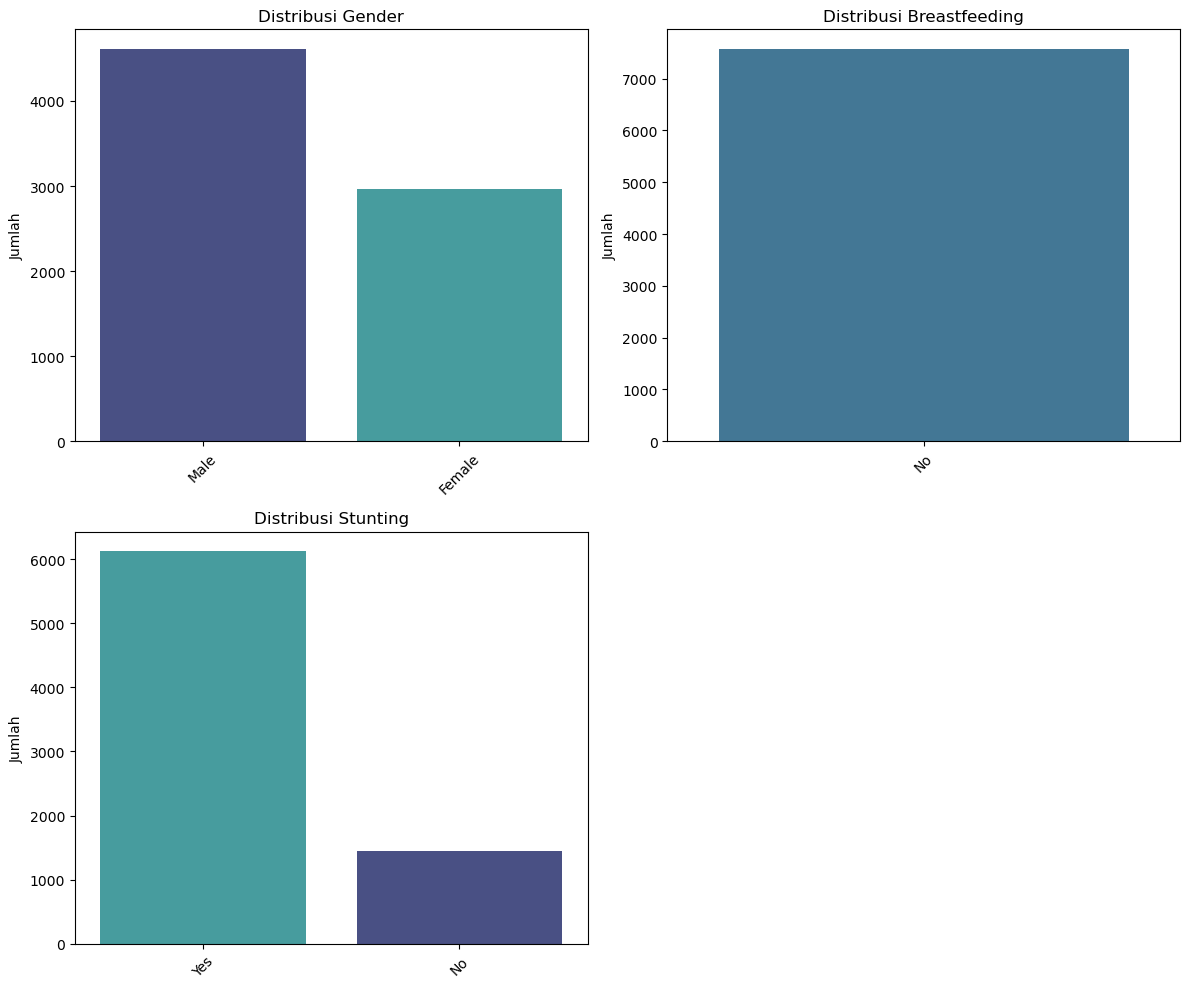

In [421]:
# visualisasi distribusi kolom kategori
fig, axes = plt.subplots(nrows=2, ncols=int(np.ceil(len(categorical) / 2)), figsize=(12, 10))
axes = axes.flatten() if len(categorical) > 1 else [axes]

for ax, col in zip(axes, categorical):
    sns.countplot(x=df_a_vis[col], order=df_a_vis[col].value_counts().index, ax=ax, hue=df_a_vis[col], palette="mako", legend=False)
    ax.set_title(f"Distribusi {col}")
    ax.set_xlabel("")
    ax.set_ylabel("Jumlah")
    ax.tick_params(axis='x', rotation=45)

for i in range(len(categorical), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

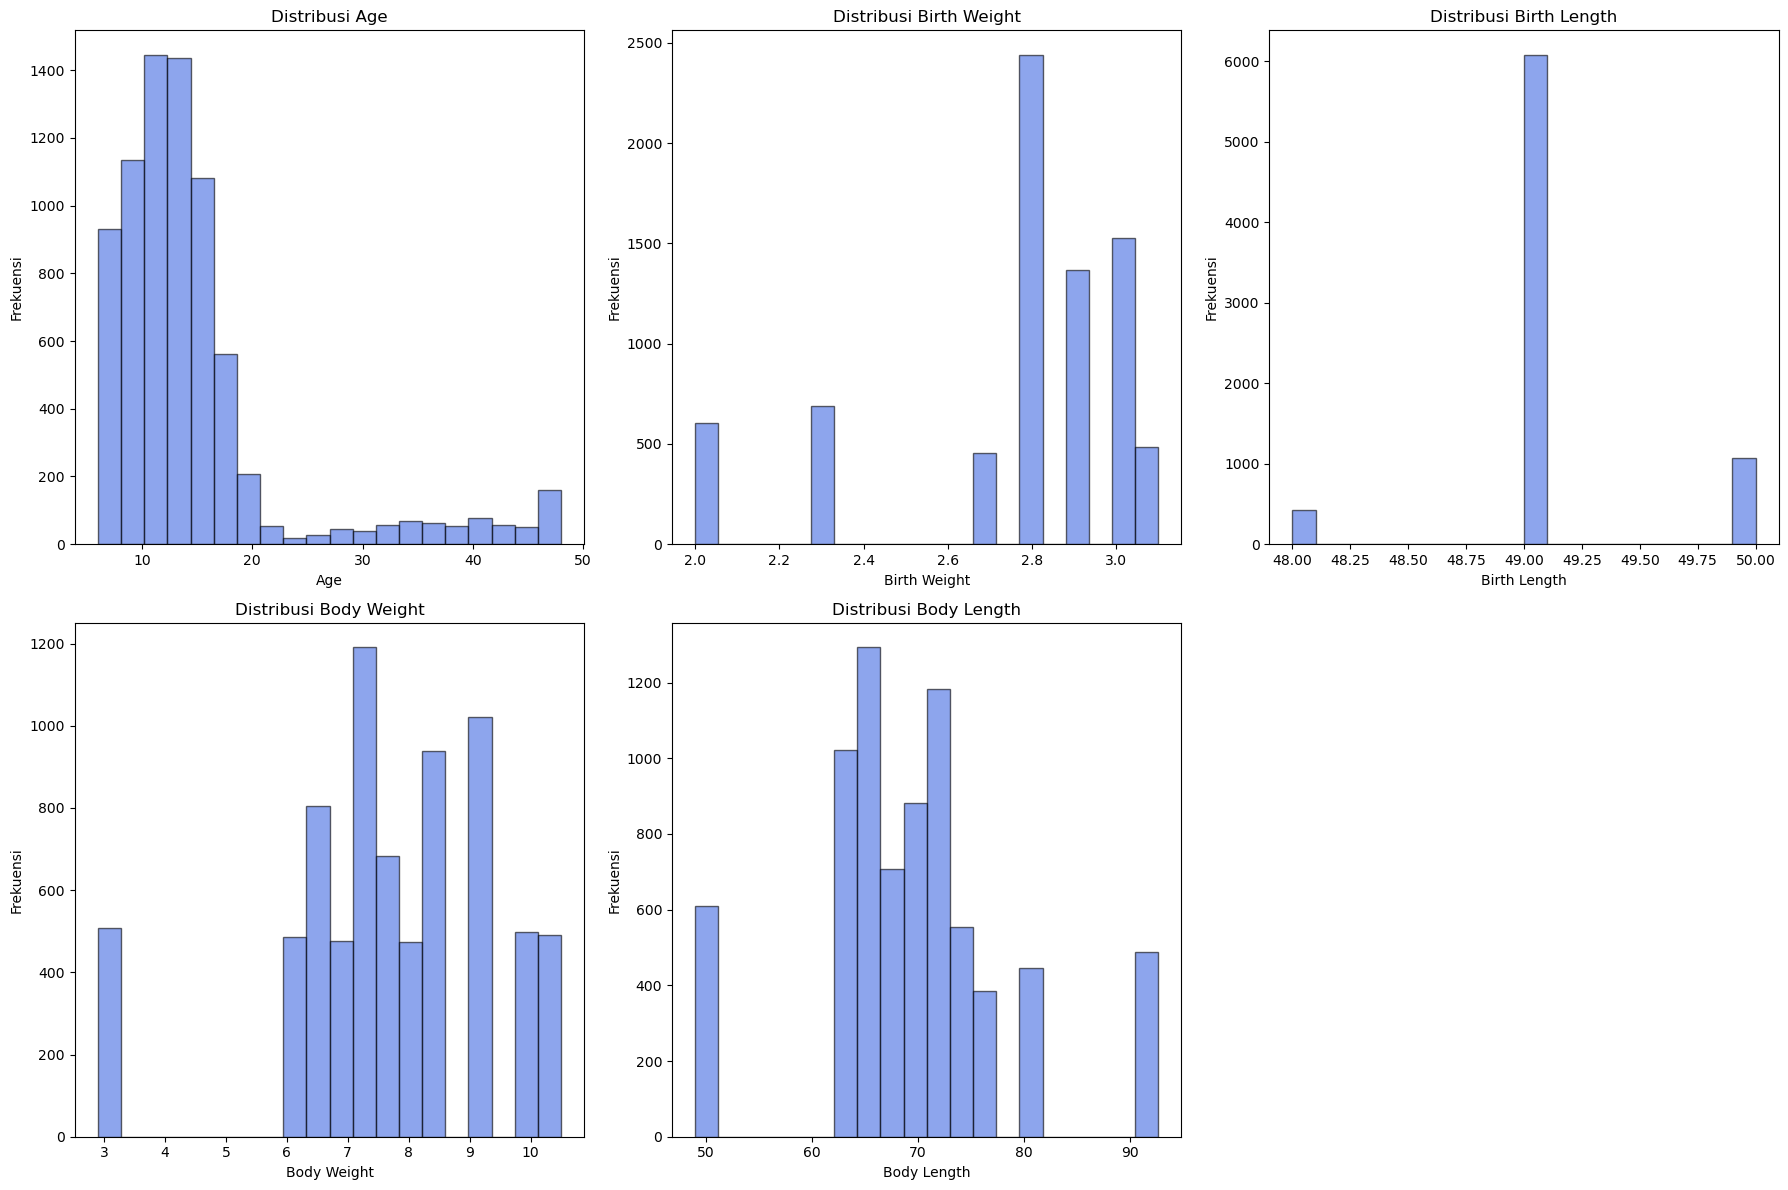

In [422]:
# Visualisasi distribusi kolom numerik
fig, axes = plt.subplots(nrows=int(np.ceil(len(numerical) / 3)), ncols=3, figsize=(18, 12))
axes = axes.flatten()

for ax, col in zip(axes, numerical):
    ax.hist(df_a_vis[col], bins=20, alpha=0.6, color='royalblue', edgecolor='black')
    ax.set_title(f"Distribusi {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frekuensi")

for i in range(len(numerical), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Dataset 2

Dataset 2 diperoleh dari situs Kaggle, diunggah oleh LAUREN VALENTINA, melalui tautan https://www.kaggle.com/datasets/laurenvalentina/gizi-anak. Data ini diakses pada bulan Februari 2025.

In [423]:
# Membaca dataset 2
df_b = pd.read_csv(r"D:\Prediksi Status Gizi\Dataset\dataset 2.csv")
df_b.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,female,56,2.9,50,11.0,90.0,Yes,No
1,female,20,3.3,49,11.1,80.5,No,No
2,male,4,2.8,48,6.5,63.0,No,No
3,female,14,2.0,49,7.0,71.0,Yes,No
4,male,32,3.2,49,11.0,88.7,Yes,No


In [424]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         6500 non-null   object 
 1   Age            6500 non-null   int64  
 2   Birth Weight   6500 non-null   float64
 3   Birth Length   6500 non-null   int64  
 4   Body Weight    6500 non-null   float64
 5   Body Length    6500 non-null   float64
 6   Breastfeeding  6500 non-null   object 
 7   Stunting       6500 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 406.4+ KB


In [425]:
df_b.isnull().sum()

Gender           0
Age              0
Birth Weight     0
Birth Length     0
Body Weight      0
Body Length      0
Breastfeeding    0
Stunting         0
dtype: int64

In [426]:
df_b.duplicated().sum()

5525

In [427]:
df_b.drop_duplicates(inplace=True)

In [428]:
df_b.shape

(975, 8)

In [429]:
df_b_vis = df_b.copy()

In [430]:
df_b_vis = df_b.copy()
numerical= df_b_vis.select_dtypes('number').columns
categorical = df_b_vis.select_dtypes('object').columns
print(f'Numerical Columns:  {df_b_vis[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df_b_vis[categorical].columns}')

Numerical Columns:  Index(['Age', 'Birth Weight', 'Birth Length', 'Body Weight', 'Body Length'], dtype='object')


Categorical Columns: Index(['Gender', 'Breastfeeding', 'Stunting'], dtype='object')


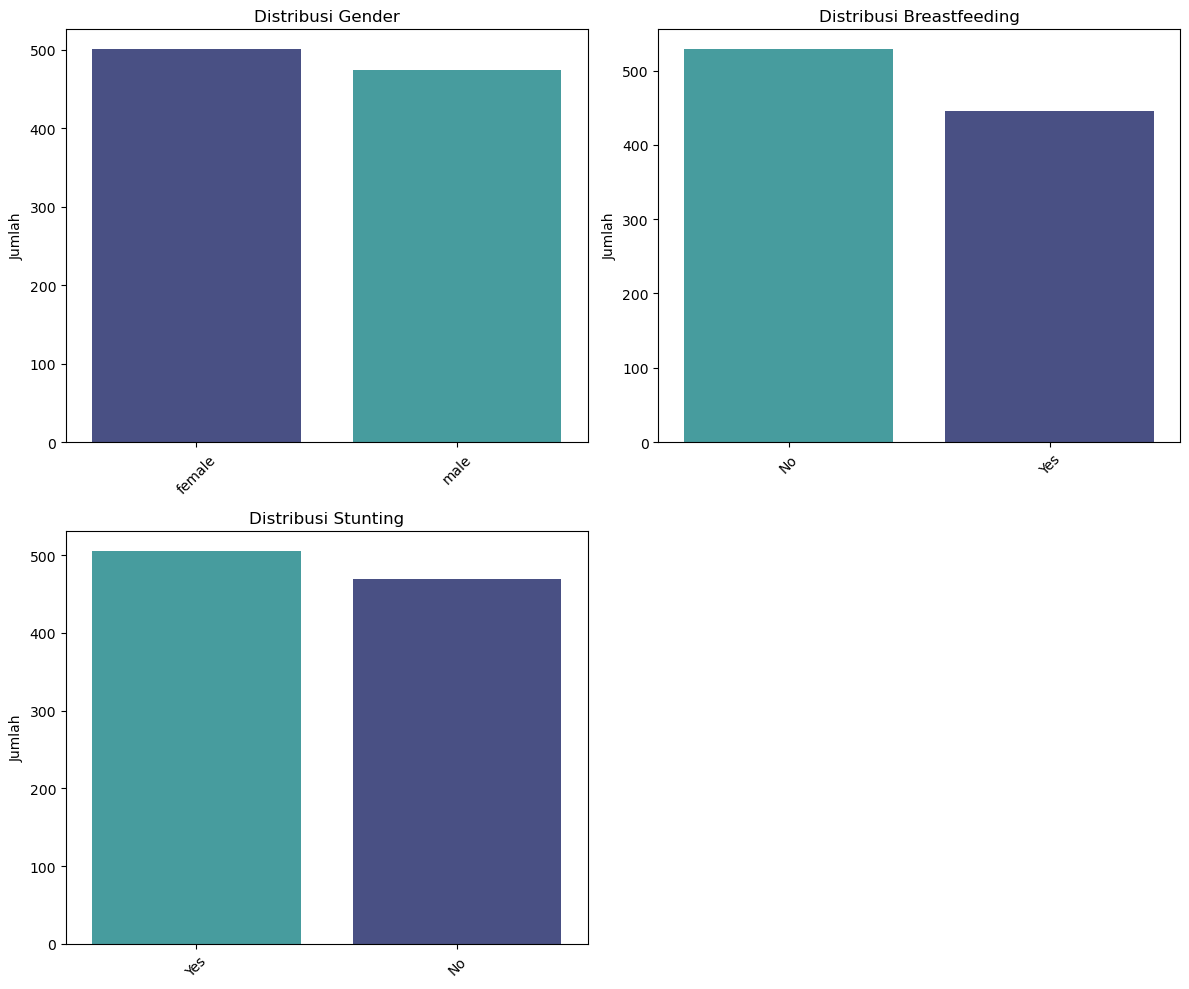

In [431]:
# visualisasi distribusi kolom kategori
fig, axes = plt.subplots(nrows=2, ncols=int(np.ceil(len(categorical) / 2)), figsize=(12, 10))
axes = axes.flatten() if len(categorical) > 1 else [axes]

for ax, col in zip(axes, categorical):
    sns.countplot(x=df_b_vis[col], order=df_b_vis[col].value_counts().index, ax=ax, hue=df_b_vis[col], palette="mako", legend=False)
    ax.set_title(f"Distribusi {col}")
    ax.set_xlabel("")
    ax.set_ylabel("Jumlah")
    ax.tick_params(axis='x', rotation=45)

for i in range(len(categorical), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

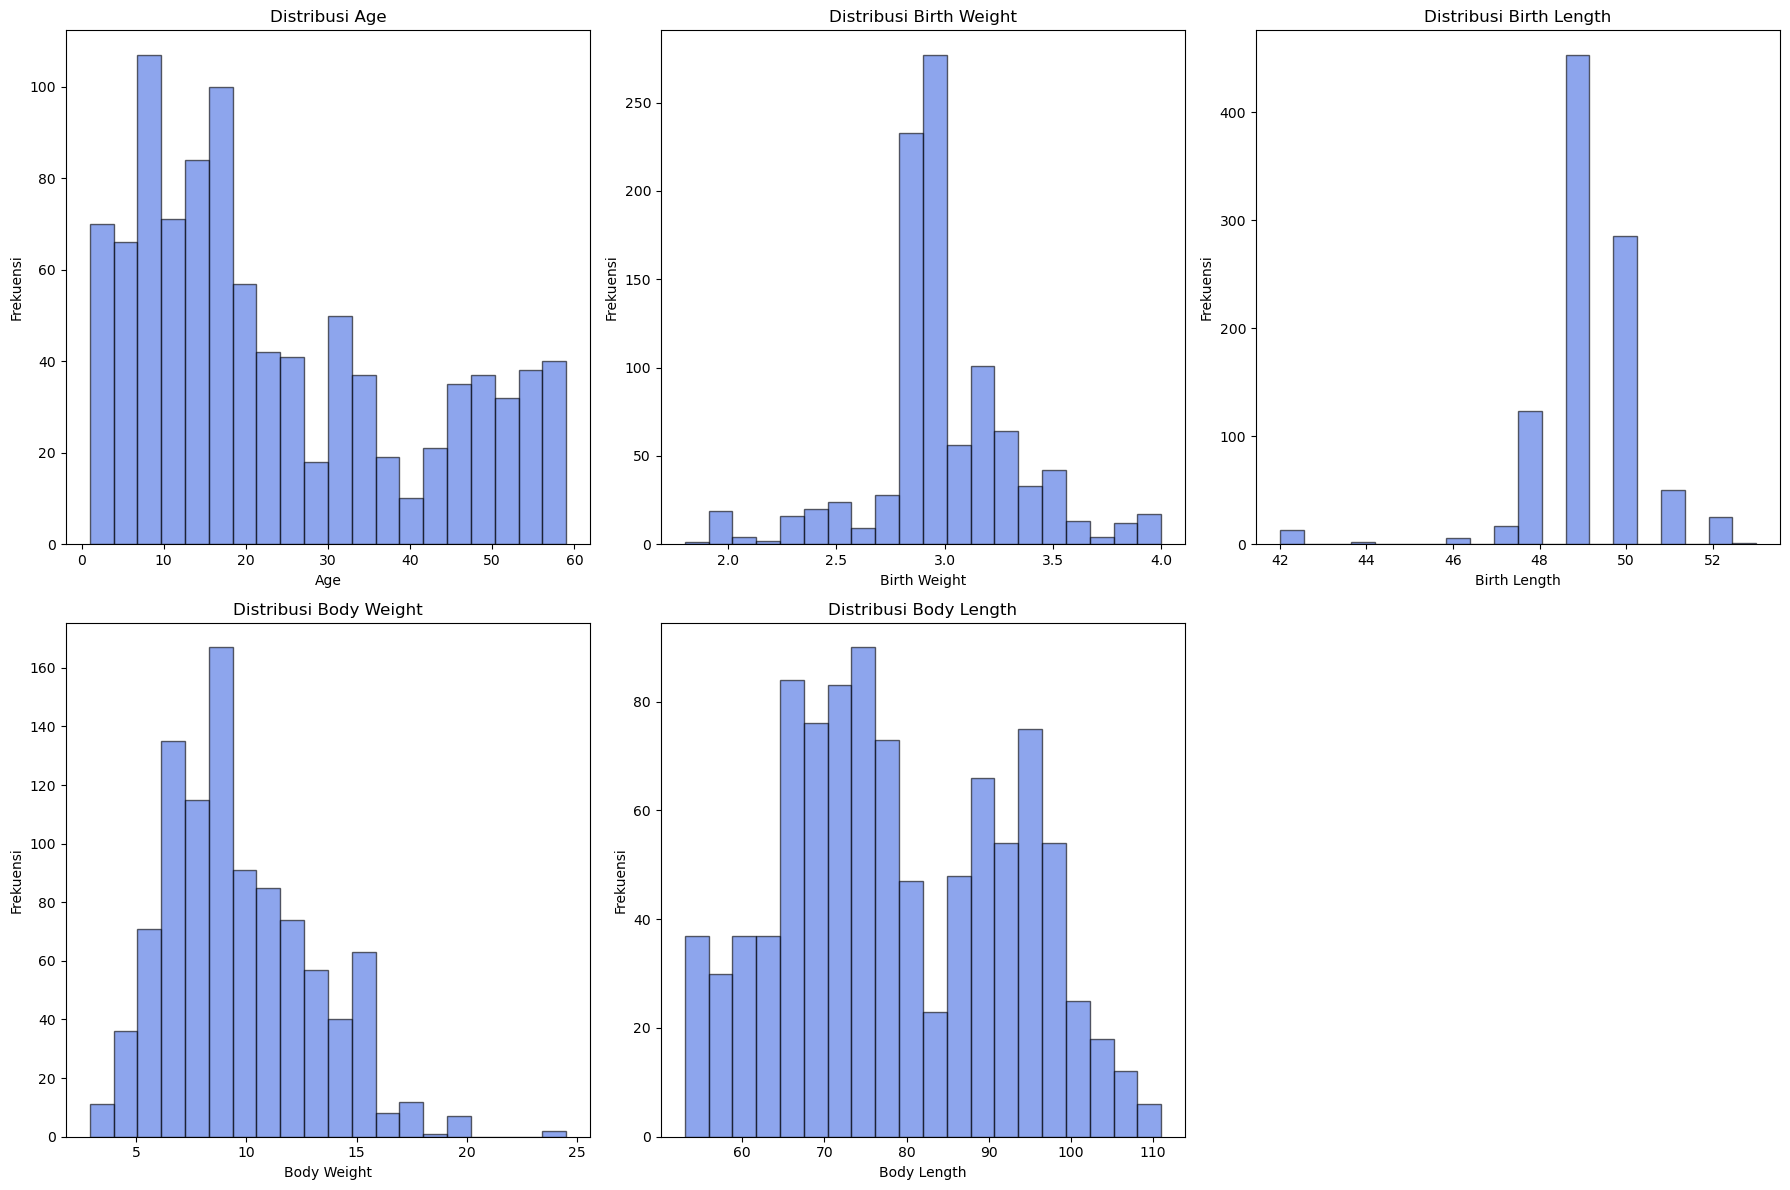

In [432]:
# Visualisasi distribusi kolom numerik
fig, axes = plt.subplots(nrows=int(np.ceil(len(numerical) / 3)), ncols=3, figsize=(18, 12))
axes = axes.flatten()

for ax, col in zip(axes, numerical):
    ax.hist(df_b_vis[col], bins=20, alpha=0.6, color='royalblue', edgecolor='black')
    ax.set_title(f"Distribusi {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frekuensi")

for i in range(len(numerical), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [433]:
#Mengubah nilai kategori kolom 'Gender' menjadi huruf kecil keseluruhan pada dataset 1 dan dataset 2
df_a["Gender"] = df_a["Gender"].str.lower()
df_b["Gender"] = df_b["Gender"].str.lower()
print(df_a["Gender"].unique())
print(df_b["Gender"].unique())

['male' 'female']
['female' 'male']


In [434]:
# Menggabungkan dataset 1 dan dataset 2
df = pd.concat([df_a, df_b], ignore_index=True)
df.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,male,17,3.0,49,10.0,72.2,No,No
1,female,11,2.9,49,2.9,65.0,No,Yes
2,male,16,2.9,49,8.5,72.2,No,Yes
3,male,31,2.8,49,6.4,63.0,No,Yes
4,male,15,3.1,49,10.5,49.0,No,Yes


In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8548 entries, 0 to 8547
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         8548 non-null   object 
 1   Age            8548 non-null   int64  
 2   Birth Weight   8548 non-null   float64
 3   Birth Length   8548 non-null   int64  
 4   Body Weight    8548 non-null   float64
 5   Body Length    8548 non-null   float64
 6   Breastfeeding  8548 non-null   object 
 7   Stunting       8548 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 534.4+ KB


In [436]:
df.isnull().sum()

Gender           0
Age              0
Birth Weight     0
Birth Length     0
Body Weight      0
Body Length      0
Breastfeeding    0
Stunting         0
dtype: int64

In [437]:
df.duplicated().sum()

5

In [438]:
df.drop_duplicates(inplace=True)

In [439]:
df.shape

(8543, 8)

In [440]:
df

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,male,17,3.0,49,10.0,72.2,No,No
1,female,11,2.9,49,2.9,65.0,No,Yes
2,male,16,2.9,49,8.5,72.2,No,Yes
3,male,31,2.8,49,6.4,63.0,No,Yes
4,male,15,3.1,49,10.5,49.0,No,Yes
...,...,...,...,...,...,...,...,...
8543,female,11,3.0,50,9.3,70.0,No,Yes
8544,female,13,2.9,49,5.0,60.0,No,Yes
8545,female,12,2.7,49,5.5,67.0,No,Yes
8546,female,18,3.0,49,9.3,74.2,No,Yes


In [441]:
df.to_csv("data stunting.csv", index=False)

# Menambahkan Kolom Tinggi Badan Menurut Umur

Berdasarkan Peraturan Menteri Kesehatan Republik Indonesia Nomor 2 Tahun 2020 Tentang Standar Antropometri Anak. Kategori status stunting atau tinggi badan menurut umur dibagi menjadi 4 yaitu, sangat pendek (severely stunted), pendek (stunted), normal, dan tinggi.

Sehingga pada data akan ditambahkan kolom status tinggi badan menurut umur seperti keterangan di atas, hal ini untuk mengganti kolom stunting yang hanya bernilai "Yes" dan "No".


In [442]:
# Membaca data tinggi badan menurut umur
df_tbu = pd.read_csv(r"D:\Prediksi Status Gizi\Dataset\data tinggi badan menurut umur versi WHO.csv")
df_tbu.head()

,Month,L,M,S,SD,SD3neg,SD2neg,SD1neg,SD0,SD1,SD2,SD3,M,Gender
0,0,1,49.8842,0.03795,1.8931,44.2,46.1,48.0,49.9,51.8,53.7,55.6,NaN,male
1,1,1,54.7244,0.03557,1.9465,48.9,50.8,52.8,54.7,56.7,58.6,60.6,NaN,male
2,2,1,58.4249,0.03424,2.0005,52.4,54.4,56.4,58.4,60.4,62.4,64.4,NaN,male
3,3,1,61.4292,0.03328,2.0444,55.3,57.3,59.4,61.4,63.5,65.5,67.6,NaN,male
4,4,1,63.8860,0.03257,2.0808,57.6,59.7,61.8,63.9,66.0,68.0,70.1,NaN,male


Pada tahap ini akan dilakukan penambahan kolom SD1neg, SD0 (Median), dan SD1 dari df_tbu ke df. Hal ini dilakukan untuk membuat kolom z-score tb/u dan status tb/u

In [443]:
data1 = df.copy()

In [444]:
data1.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,male,17,3.0,49,10.0,72.2,No,No
1,female,11,2.9,49,2.9,65.0,No,Yes
2,male,16,2.9,49,8.5,72.2,No,Yes
3,male,31,2.8,49,6.4,63.0,No,Yes
4,male,15,3.1,49,10.5,49.0,No,Yes


In [445]:
# mengganti nama kolom 'Month' menjadi 'Age' supaya sesuai
df_tbu = df_tbu.rename(columns={"Month": "Age"})

In [446]:
# Menambahkan kolom SD1neg, SD0, dan SD1
data1 = data1.merge(
    df_tbu[["Age", "Gender", "SD1neg", "SD0", "SD1"]],
    on=["Age", "Gender"],
    how="left") # Menggunakan left join agar data asli di df tetap utuh
data1.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting,SD1neg,SD0,SD1
0,male,17,3.0,49,10.0,72.2,No,No,78.6,81.2,83.9
1,female,11,2.9,49,2.9,65.0,No,Yes,70.3,72.8,75.3
2,male,16,2.9,49,8.5,72.2,No,Yes,77.6,80.2,82.8
3,male,31,2.8,49,6.4,63.0,No,Yes,89.2,92.7,96.1
4,male,15,3.1,49,10.5,49.0,No,Yes,76.6,79.1,81.7


In [447]:
data1.isnull().sum()

Gender           0
Age              0
Birth Weight     0
Birth Length     0
Body Weight      0
Body Length      0
Breastfeeding    0
Stunting         0
SD1neg           0
SD0              0
SD1              0
dtype: int64

In [448]:
data1.duplicated().sum()

0

In [449]:
# Membuat kolom z-score status tinggi badan menurut umur, dengan rumus perhitungan z-score
def calculate_z_score(body_length, median, minus1sd, plus1sd):
    if body_length < median:
        z_score = (body_length- median) / (median - minus1sd)
    else:
        z_score = (body_length - median) / (plus1sd - median)
    return z_score

data1['Z_Score_tb_u'] = data1.apply(
    lambda row: calculate_z_score(row['Body Length'], row['SD0'], row['SD1neg'], row['SD1']),
    axis=1
)
data1.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting,SD1neg,SD0,SD1,Z_Score_tb_u
0,male,17,3.0,49,10.0,72.2,No,No,78.6,81.2,83.9,-3.461538
1,female,11,2.9,49,2.9,65.0,No,Yes,70.3,72.8,75.3,-3.120000
2,male,16,2.9,49,8.5,72.2,No,Yes,77.6,80.2,82.8,-3.076923
3,male,31,2.8,49,6.4,63.0,No,Yes,89.2,92.7,96.1,-8.485714
4,male,15,3.1,49,10.5,49.0,No,Yes,76.6,79.1,81.7,-12.040000


In [450]:
data1.isnull().sum()

Gender           0
Age              0
Birth Weight     0
Birth Length     0
Body Weight      0
Body Length      0
Breastfeeding    0
Stunting         0
SD1neg           0
SD0              0
SD1              0
Z_Score_tb_u     0
dtype: int64

In [451]:
data1.duplicated().sum()

0

In [452]:
# Membuat kolom Status Tinggi Badan
def get_categorizeTBU(value):
    if value < -3:
        return "Sangat pendek"
    elif -3 <= value < -2:
        return "Pendek"
    elif -2 <= value <= 3:
        return "Normal"
    elif value > 3:
        return "Tinggi"
    else:
        return None

data1['Status Tinggi Badan'] = data1['Z_Score_tb_u'].apply(get_categorizeTBU)
data1.head(10)

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting,SD1neg,SD0,SD1,Z_Score_tb_u,Status Tinggi Badan
0,male,17,3.0,49,10.0,72.2,No,No,78.6,81.2,83.9,-3.461538,Sangat pendek
1,female,11,2.9,49,2.9,65.0,No,Yes,70.3,72.8,75.3,-3.120000,Sangat pendek
2,male,16,2.9,49,8.5,72.2,No,Yes,77.6,80.2,82.8,-3.076923,Sangat pendek
3,male,31,2.8,49,6.4,63.0,No,Yes,89.2,92.7,96.1,-8.485714,Sangat pendek
4,male,15,3.1,49,10.5,49.0,No,Yes,76.6,79.1,81.7,-12.040000,Sangat pendek
5,female,11,2.8,49,8.5,65.0,No,No,70.3,72.8,75.3,-3.120000,Sangat pendek
6,male,35,2.8,49,10.5,72.2,No,Yes,91.8,95.4,99.1,-6.444444,Sangat pendek
7,female,17,2.8,49,8.0,63.0,No,Yes,76.8,79.7,82.5,-5.758621,Sangat pendek
8,female,10,2.7,49,8.4,73.5,No,No,69.0,71.5,73.9,0.833333,Normal
9,female,16,2.8,49,8.5,65.0,No,Yes,75.8,78.6,81.4,-4.857143,Sangat pendek


In [453]:
data1.to_excel("data1.xlsx", index=False)

In [454]:
data1.isnull().sum()

Gender                 0
Age                    0
Birth Weight           0
Birth Length           0
Body Weight            0
Body Length            0
Breastfeeding          0
Stunting               0
SD1neg                 0
SD0                    0
SD1                    0
Z_Score_tb_u           0
Status Tinggi Badan    0
dtype: int64

In [455]:
data1.duplicated().sum()

0

Menghapus klom yang tidak diperlukan seperti SD1neg, SD0, SD1, dan Z_Score_tb_u yang hanya diperlukan untuk perhitungan status tinggi badan serta kolom stunting yang sudah diwakilkan oleh kolom status tinggi badan

In [456]:
# Menghapus kolom-kolom yang tidak diperlukan
data1 = data1.drop(columns=["SD1neg", "SD0", "SD1", "Z_Score_tb_u", "Stunting"])
data1.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Status Tinggi Badan
0,male,17,3.0,49,10.0,72.2,No,Sangat pendek
1,female,11,2.9,49,2.9,65.0,No,Sangat pendek
2,male,16,2.9,49,8.5,72.2,No,Sangat pendek
3,male,31,2.8,49,6.4,63.0,No,Sangat pendek
4,male,15,3.1,49,10.5,49.0,No,Sangat pendek


In [457]:
data1.isnull().sum()

Gender                 0
Age                    0
Birth Weight           0
Birth Length           0
Body Weight            0
Body Length            0
Breastfeeding          0
Status Tinggi Badan    0
dtype: int64

In [458]:
data1.duplicated().sum()

376

In [459]:
data1.drop_duplicates(inplace=True)

In [460]:
data1.shape

(8167, 8)

# Menambahkan Kolom Berat Badan Menurut Umur

Berdasarkan Peraturan Menteri Kesehatan Republik Indonesia Nomor 2 Tahun 2020 tentang Standar Antropometri Anak, penilaian status gizi anak dilakukan melalui pemantauan pertumbuhan menggunakan standar yang telah ditetapkan. Untuk anak usia 0 hingga 60 bulan, terdapat tiga indeks utama yang digunakan, yaitu Berat Badan menurut Umur (BB/U), Panjang atau Tinggi Badan menurut Umur (PB/U atau TB/U), dan Berat Badan menurut Panjang atau Tinggi Badan (BB/PB atau BB/TB).

In [461]:
# Membaca data berat badan menurut umur
df_bbu = pd.read_csv(r"D:\Prediksi Status Gizi\Dataset\data berat badan menurut umur versi WHO.csv")
df_bbu.head()

,Month,L,M,S,SD3neg,SD2neg,SD1neg,SD0,SD1,SD2,SD3,Gender
0,0,0.3487,3.3464,0.14602,2.1,2.5,2.9,3.3,3.9,4.4,5.0,male
1,1,0.2297,4.4709,0.13395,2.9,3.4,3.9,4.5,5.1,5.8,6.6,male
2,2,0.1970,5.5675,0.12385,3.8,4.3,4.9,5.6,6.3,7.1,8.0,male
3,3,0.1738,6.3762,0.11727,4.4,5.0,5.7,6.4,7.2,8.0,9.0,male
4,4,0.1553,7.0023,0.11316,4.9,5.6,6.2,7.0,7.8,8.7,9.7,male


In [462]:
data1.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Status Tinggi Badan
0,male,17,3.0,49,10.0,72.2,No,Sangat pendek
1,female,11,2.9,49,2.9,65.0,No,Sangat pendek
2,male,16,2.9,49,8.5,72.2,No,Sangat pendek
3,male,31,2.8,49,6.4,63.0,No,Sangat pendek
4,male,15,3.1,49,10.5,49.0,No,Sangat pendek


In [463]:
# mengganti nama kolom 'Month' menjadi 'Age' supaya sesuai
df_bbu = df_bbu.rename(columns={"Month": "Age"})

In [464]:
# Menambahkan kolom SD1neg,
data1 = data1.merge(
    df_bbu[["Age", "Gender", "SD1neg", "SD0", "SD1"]],
    on=["Age", "Gender"],
    how="left") # Menggunakan left join agar data asli df tetap utuh
data1.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Status Tinggi Badan,SD1neg,SD0,SD1
0,male,17,3.0,49,10.0,72.2,No,Sangat pendek,9.6,10.7,12.0
1,female,11,2.9,49,2.9,65.0,No,Sangat pendek,7.7,8.7,9.9
2,male,16,2.9,49,8.5,72.2,No,Sangat pendek,9.4,10.5,11.7
3,male,31,2.8,49,6.4,63.0,No,Sangat pendek,12.0,13.5,15.2
4,male,15,3.1,49,10.5,49.0,No,Sangat pendek,9.2,10.3,11.5


In [465]:
data1.isnull().sum()

Gender                 0
Age                    0
Birth Weight           0
Birth Length           0
Body Weight            0
Body Length            0
Breastfeeding          0
Status Tinggi Badan    0
SD1neg                 0
SD0                    0
SD1                    0
dtype: int64

In [466]:
data1.duplicated().sum()

0

In [467]:
# Membuat kolom z-score status berat badan menurut umur
def calculate_z_score(body_weight, median, minus1sd, plus1sd):
    if body_weight < median:
        z_score = (body_weight - median) / (median - minus1sd)
    else:
        z_score = (body_weight - median) / (plus1sd - median)
    return z_score

data1['Z_Score_bb_u'] = data1.apply(
    lambda row: calculate_z_score(row['Body Weight'], row['SD0'], row['SD1neg'], row['SD1']),
    axis=1
)

data1.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Status Tinggi Badan,SD1neg,SD0,SD1,Z_Score_bb_u
0,male,17,3.0,49,10.0,72.2,No,Sangat pendek,9.6,10.7,12.0,-0.636364
1,female,11,2.9,49,2.9,65.0,No,Sangat pendek,7.7,8.7,9.9,-5.800000
2,male,16,2.9,49,8.5,72.2,No,Sangat pendek,9.4,10.5,11.7,-1.818182
3,male,31,2.8,49,6.4,63.0,No,Sangat pendek,12.0,13.5,15.2,-4.733333
4,male,15,3.1,49,10.5,49.0,No,Sangat pendek,9.2,10.3,11.5,0.166667


In [468]:
data1.isnull().sum()

Gender                 0
Age                    0
Birth Weight           0
Birth Length           0
Body Weight            0
Body Length            0
Breastfeeding          0
Status Tinggi Badan    0
SD1neg                 0
SD0                    0
SD1                    0
Z_Score_bb_u           0
dtype: int64

In [469]:
data1.duplicated().sum()

0

In [470]:
# Membuat kolom status berat badan
def get_categorizeBBU(value):
    if value < -3:
        return "Berat badan sangat kurang"
    elif -3 <= value < -2:
        return "Berat badan kurang"
    elif -2 <= value <= 1:
        return "Berat badan normal"
    elif value > 1:
        return "Risiko berat badan lebih"
    else:
        return None

data1['Status Berat Badan'] = data1['Z_Score_bb_u'].apply(get_categorizeBBU)
data1.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Status Tinggi Badan,SD1neg,SD0,SD1,Z_Score_bb_u,Status Berat Badan
0,male,17,3.0,49,10.0,72.2,No,Sangat pendek,9.6,10.7,12.0,-0.636364,Berat badan normal
1,female,11,2.9,49,2.9,65.0,No,Sangat pendek,7.7,8.7,9.9,-5.800000,Berat badan sangat kurang
2,male,16,2.9,49,8.5,72.2,No,Sangat pendek,9.4,10.5,11.7,-1.818182,Berat badan normal
3,male,31,2.8,49,6.4,63.0,No,Sangat pendek,12.0,13.5,15.2,-4.733333,Berat badan sangat kurang
4,male,15,3.1,49,10.5,49.0,No,Sangat pendek,9.2,10.3,11.5,0.166667,Berat badan normal


In [471]:
data1.isnull().sum()

Gender                 0
Age                    0
Birth Weight           0
Birth Length           0
Body Weight            0
Body Length            0
Breastfeeding          0
Status Tinggi Badan    0
SD1neg                 0
SD0                    0
SD1                    0
Z_Score_bb_u           0
Status Berat Badan     0
dtype: int64

In [472]:
data1.duplicated().sum()

0

In [473]:
# Menghapus kolom-kolom yang tidak diperlukan
data1 = data1.drop(columns=["SD1neg", "SD0", "SD1", "Z_Score_bb_u"])
data1.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Status Tinggi Badan,Status Berat Badan
0,male,17,3.0,49,10.0,72.2,No,Sangat pendek,Berat badan normal
1,female,11,2.9,49,2.9,65.0,No,Sangat pendek,Berat badan sangat kurang
2,male,16,2.9,49,8.5,72.2,No,Sangat pendek,Berat badan normal
3,male,31,2.8,49,6.4,63.0,No,Sangat pendek,Berat badan sangat kurang
4,male,15,3.1,49,10.5,49.0,No,Sangat pendek,Berat badan normal


In [474]:
data1.isnull().sum()

Gender                 0
Age                    0
Birth Weight           0
Birth Length           0
Body Weight            0
Body Length            0
Breastfeeding          0
Status Tinggi Badan    0
Status Berat Badan     0
dtype: int64

In [475]:
data1.duplicated().sum()

0

In [476]:
data1.shape

(8167, 9)

# Menambahkan Kolom Berat Badan Menurut Tinggi Badan

In [477]:
# Membaca data berat badan menurut tinggi badan
df_bbtb = pd.read_csv(r"D:\Prediksi Status Gizi\Dataset\data berat badan menurut tinggi badan versi WHO.csv")
df_bbtb.head()

,Height,L,M,S,SD4neg,SD3neg,SD2neg,SD1neg,SD0,SD1,SD2,SD3,SD4,Gender,Note
0,45.0,-0.3521,2.4410,0.09182,1.710,1.877,2.043,2.230,2.441,2.680,2.951,3.261,3.571,male,Under 2 years
1,45.1,-0.3521,2.4577,0.09176,1.722,1.890,2.057,2.245,2.458,2.698,2.971,3.283,3.595,male,Under 2 years
2,45.2,-0.3521,2.4744,0.09170,1.734,1.903,2.072,2.261,2.474,2.716,2.991,3.305,3.618,male,Under 2 years
3,45.3,-0.3521,2.4911,0.09164,1.747,1.916,2.086,2.276,2.491,2.734,3.011,3.326,3.642,male,Under 2 years
4,45.4,-0.3521,2.5078,0.09159,1.759,1.929,2.100,2.292,2.508,2.752,3.031,3.348,3.666,male,Under 2 years


In [478]:
print(df_bbtb)

      Height       L        M        S  SD4neg  SD3neg  SD2neg  SD1neg  \
0       45.0 -0.3521   2.4410  0.09182   1.710   1.877   2.043   2.230   
1       45.1 -0.3521   2.4577  0.09176   1.722   1.890   2.057   2.245   
2       45.2 -0.3521   2.4744  0.09170   1.734   1.903   2.072   2.261   
3       45.3 -0.3521   2.4911  0.09164   1.747   1.916   2.086   2.276   
4       45.4 -0.3521   2.5078  0.09159   1.759   1.929   2.100   2.292   
...      ...     ...      ...      ...     ...     ...     ...     ...   
2399   119.6 -0.3833  22.6444  0.09812  15.525  17.133  18.741  20.565   
2400   119.7 -0.3833  22.6877  0.09816  15.553  17.164  18.775  20.604   
2401   119.8 -0.3833  22.7309  0.09820  15.580  17.195  18.810  20.642   
2402   119.9 -0.3833  22.7741  0.09824  15.607  17.226  18.844  20.680   
2403   120.0 -0.3833  22.8173  0.09828  15.634  17.256  18.878  20.719   

         SD0     SD1     SD2     SD3     SD4  Gender           Note  
0      2.441   2.680   2.951   3.261   3.

In [479]:
print(data1)

      Gender  Age  Birth Weight  Birth Length  Body Weight  Body Length  \
0       male   17           3.0            49         10.0         72.2   
1     female   11           2.9            49          2.9         65.0   
2       male   16           2.9            49          8.5         72.2   
3       male   31           2.8            49          6.4         63.0   
4       male   15           3.1            49         10.5         49.0   
...      ...  ...           ...           ...          ...          ...   
8162  female   11           3.0            50          9.3         70.0   
8163  female   13           2.9            49          5.0         60.0   
8164  female   12           2.7            49          5.5         67.0   
8165  female   18           3.0            49          9.3         74.2   
8166  female   16           2.9            49          6.0         77.0   

     Breastfeeding Status Tinggi Badan         Status Berat Badan  
0               No       Sangat

In [480]:
# mengganti nama kolom 'Month' menjadi 'Age' supaya sesuai
df_bbtb = df_bbtb.rename(columns={"Height": "Body Length"})

In [481]:
# Filter jadi dua dataset untuk data1
under2 = data1[data1["Age"] <= 24].copy()
over2 = data1[data1["Age"] > 24].copy()

In [482]:
# Filter jadi dua dataset untuk df_bbtb
df_bbtb1 = df_bbtb[df_bbtb['Note'] == 'Under 2 years'].copy()
df_bbtb2 = df_bbtb[df_bbtb['Note'] == 'Over 2 years'].copy()

In [483]:
under2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7091 entries, 0 to 8166
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               7091 non-null   object 
 1   Age                  7091 non-null   int64  
 2   Birth Weight         7091 non-null   float64
 3   Birth Length         7091 non-null   int64  
 4   Body Weight          7091 non-null   float64
 5   Body Length          7091 non-null   float64
 6   Breastfeeding        7091 non-null   object 
 7   Status Tinggi Badan  7091 non-null   object 
 8   Status Berat Badan   7091 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 554.0+ KB


In [484]:
df_bbtb1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1301
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Body Length  1302 non-null   float64
 1   L            1302 non-null   float64
 2   M            1302 non-null   float64
 3   S            1302 non-null   float64
 4   SD4neg       1302 non-null   float64
 5   SD3neg       1302 non-null   float64
 6   SD2neg       1302 non-null   float64
 7   SD1neg       1302 non-null   float64
 8   SD0          1302 non-null   float64
 9   SD1          1302 non-null   float64
 10  SD2          1302 non-null   float64
 11  SD3          1302 non-null   float64
 12  SD4          1302 non-null   float64
 13  Gender       1302 non-null   object 
 14  Note         1302 non-null   object 
dtypes: float64(13), object(2)
memory usage: 162.8+ KB


In [485]:
under2 = pd.merge(
    under2,
    df_bbtb1[['Body Length', 'Gender', 'SD1neg', 'SD0', 'SD1']],
    on=['Body Length', 'Gender'],
    how='left'
)
under2.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Status Tinggi Badan,Status Berat Badan,SD1neg,SD0,SD1
0,male,17,3.0,49,10.0,72.2,No,Sangat pendek,Berat badan normal,8.217,8.914,9.693
1,female,11,2.9,49,2.9,65.0,No,Sangat pendek,Berat badan sangat kurang,6.474,7.081,7.770
2,male,16,2.9,49,8.5,72.2,No,Sangat pendek,Berat badan normal,8.217,8.914,9.693
3,male,15,3.1,49,10.5,49.0,No,Sangat pendek,Berat badan normal,2.867,3.131,3.429
4,female,11,2.8,49,8.5,65.0,No,Sangat pendek,Berat badan normal,6.474,7.081,7.770


In [486]:
under2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7091 entries, 0 to 7090
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               7091 non-null   object 
 1   Age                  7091 non-null   int64  
 2   Birth Weight         7091 non-null   float64
 3   Birth Length         7091 non-null   int64  
 4   Body Weight          7091 non-null   float64
 5   Body Length          7091 non-null   float64
 6   Breastfeeding        7091 non-null   object 
 7   Status Tinggi Badan  7091 non-null   object 
 8   Status Berat Badan   7091 non-null   object 
 9   SD1neg               7091 non-null   float64
 10  SD0                  7091 non-null   float64
 11  SD1                  7091 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 664.9+ KB


In [487]:
over2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1076 entries, 3 to 8159
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               1076 non-null   object 
 1   Age                  1076 non-null   int64  
 2   Birth Weight         1076 non-null   float64
 3   Birth Length         1076 non-null   int64  
 4   Body Weight          1076 non-null   float64
 5   Body Length          1076 non-null   float64
 6   Breastfeeding        1076 non-null   object 
 7   Status Tinggi Badan  1076 non-null   object 
 8   Status Berat Badan   1076 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 84.1+ KB


In [488]:
df_bbtb2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1102 entries, 1302 to 2403
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Body Length  1102 non-null   float64
 1   L            1102 non-null   float64
 2   M            1102 non-null   float64
 3   S            1102 non-null   float64
 4   SD4neg       1102 non-null   float64
 5   SD3neg       1102 non-null   float64
 6   SD2neg       1102 non-null   float64
 7   SD1neg       1102 non-null   float64
 8   SD0          1102 non-null   float64
 9   SD1          1102 non-null   float64
 10  SD2          1102 non-null   float64
 11  SD3          1102 non-null   float64
 12  SD4          1102 non-null   float64
 13  Gender       1102 non-null   object 
 14  Note         1102 non-null   object 
dtypes: float64(13), object(2)
memory usage: 137.8+ KB


In [489]:
df_bbtb2.duplicated().sum()

0

In [490]:
over2 = pd.merge(
    over2,
    df_bbtb2[['Body Length', 'Gender', 'SD1neg', 'SD0', 'SD1']],
    on=['Body Length', 'Gender'],
    how='left'
)
over2.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Status Tinggi Badan,Status Berat Badan,SD1neg,SD0,SD1
0,male,31,2.8,49,6.4,63.0,No,Sangat pendek,Berat badan sangat kurang,NaN,NaN,NaN
1,male,35,2.8,49,10.5,72.2,No,Sangat pendek,Berat badan kurang,8.356,9.065,9.858
2,male,44,3.0,49,7.1,72.2,No,Sangat pendek,Berat badan sangat kurang,8.356,9.065,9.858
3,female,47,2.8,49,7.0,92.7,No,Pendek,Berat badan sangat kurang,12.195,13.315,14.583
4,female,41,3.0,49,7.1,73.5,No,Sangat pendek,Berat badan sangat kurang,8.235,8.998,9.863


In [491]:
over2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               1076 non-null   object 
 1   Age                  1076 non-null   int64  
 2   Birth Weight         1076 non-null   float64
 3   Birth Length         1076 non-null   int64  
 4   Body Weight          1076 non-null   float64
 5   Body Length          1076 non-null   float64
 6   Breastfeeding        1076 non-null   object 
 7   Status Tinggi Badan  1076 non-null   object 
 8   Status Berat Badan   1076 non-null   object 
 9   SD1neg               922 non-null    float64
 10  SD0                  922 non-null    float64
 11  SD1                  922 non-null    float64
dtypes: float64(6), int64(2), object(4)
memory usage: 101.0+ KB


In [492]:
over2.isnull().sum()

Gender                   0
Age                      0
Birth Weight             0
Birth Length             0
Body Weight              0
Body Length              0
Breastfeeding            0
Status Tinggi Badan      0
Status Berat Badan       0
SD1neg                 154
SD0                    154
SD1                    154
dtype: int64

In [493]:
over2.duplicated().sum()

0

In [494]:
data = pd.concat([over2, under2], ignore_index=True)

In [495]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8167 entries, 0 to 8166
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               8167 non-null   object 
 1   Age                  8167 non-null   int64  
 2   Birth Weight         8167 non-null   float64
 3   Birth Length         8167 non-null   int64  
 4   Body Weight          8167 non-null   float64
 5   Body Length          8167 non-null   float64
 6   Breastfeeding        8167 non-null   object 
 7   Status Tinggi Badan  8167 non-null   object 
 8   Status Berat Badan   8167 non-null   object 
 9   SD1neg               8013 non-null   float64
 10  SD0                  8013 non-null   float64
 11  SD1                  8013 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 765.8+ KB


In [496]:
data.isnull().sum()

Gender                   0
Age                      0
Birth Weight             0
Birth Length             0
Body Weight              0
Body Length              0
Breastfeeding            0
Status Tinggi Badan      0
Status Berat Badan       0
SD1neg                 154
SD0                    154
SD1                    154
dtype: int64

Penambahan kolom SD1neg, SD0, dan SD1 dilakukan berdasarkan nilai tinggi badan dan jenis kelamin, setelah ditambahkan terdapat nilai null sebanyak 154 yang diakibatkan tidak ada nilai tinggi badan yang cocok di kedua dataset

explorasi data null

In [497]:
null_rows = data[data[['SD1neg', 'SD0', 'SD1']].isnull().any(axis=1)]
print(null_rows)

      Gender  Age  Birth Weight  Birth Length  Body Weight  Body Length  \
0       male   31           2.8            49          6.4         63.0   
6       male   47           3.0            49          9.0         63.0   
7       male   32           2.8            49          7.2         63.0   
13    female   32           3.0            49          9.0         49.0   
15    female   33           3.0            49          8.4         63.0   
...      ...  ...           ...           ...          ...          ...   
697   female   46           2.7            49          7.7         63.0   
780     male   59           3.4            50         15.0         59.0   
881     male   42           3.0            49         10.5         63.0   
1034  female   25           2.5            48          5.0         60.0   
1062  female   47           2.8            48          6.0         54.0   

     Breastfeeding Status Tinggi Badan         Status Berat Badan  SD1neg  \
0               No    

In [498]:
# Cek nilai unik
print("Nilai unik Body Length yang null:")
print(null_rows['Body Length'].unique())

# Cek rentang nilai tinggi badan
print("Rentang Body Length:")
print("Min:", null_rows['Body Length'].min())
print("Max:", null_rows['Body Length'].max())

Nilai unik Body Length yang null:
[63. 49. 59. 60. 54.]
Rentang Body Length:
Min: 49.0
Max: 63.0


nilai null tersebut disebabkan karena nilai-nilai tersebut tidak ada di daftar data berat badan menurut tinggi badan usia dua tahun keatas menurut peraturan kemenkes dan WHO, sehingga baris yang memiliki nilai null akan dihapus

In [499]:
data.dropna(subset=['SD1neg', 'SD0', 'SD1'], inplace=True)

In [500]:
data.isnull().sum()

Gender                 0
Age                    0
Birth Weight           0
Birth Length           0
Body Weight            0
Body Length            0
Breastfeeding          0
Status Tinggi Badan    0
Status Berat Badan     0
SD1neg                 0
SD0                    0
SD1                    0
dtype: int64

In [501]:
data.duplicated().sum()

0

In [502]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8013 entries, 1 to 8166
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               8013 non-null   object 
 1   Age                  8013 non-null   int64  
 2   Birth Weight         8013 non-null   float64
 3   Birth Length         8013 non-null   int64  
 4   Body Weight          8013 non-null   float64
 5   Body Length          8013 non-null   float64
 6   Breastfeeding        8013 non-null   object 
 7   Status Tinggi Badan  8013 non-null   object 
 8   Status Berat Badan   8013 non-null   object 
 9   SD1neg               8013 non-null   float64
 10  SD0                  8013 non-null   float64
 11  SD1                  8013 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 813.8+ KB


In [503]:
def calculate_z_score(body_weight, median, minus1sd, plus1sd):
    if body_weight < median:
        z_score = (body_weight - median) / (median - minus1sd)
    else:
        z_score = (body_weight - median) / (plus1sd - median)
    return z_score

data['Z_Score_bb_tb'] = data.apply(
    lambda row: calculate_z_score(row['Body Weight'], row['SD0'], row['SD1neg'], row['SD1']),
    axis=1
)

data.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Status Tinggi Badan,Status Berat Badan,SD1neg,SD0,SD1,Z_Score_bb_tb
1,male,35,2.8,49,10.5,72.2,No,Sangat pendek,Berat badan kurang,8.356,9.065,9.858,1.809584
2,male,44,3.0,49,7.1,72.2,No,Sangat pendek,Berat badan sangat kurang,8.356,9.065,9.858,-2.771509
3,female,47,2.8,49,7.0,92.7,No,Pendek,Berat badan sangat kurang,12.195,13.315,14.583,-5.638393
4,female,41,3.0,49,7.1,73.5,No,Sangat pendek,Berat badan sangat kurang,8.235,8.998,9.863,-2.487549
5,female,42,2.8,49,10.0,65.0,No,Sangat pendek,Berat badan kurang,6.620,7.240,7.944,3.920455


In [504]:
# Membuat kolom status gizi
def get_categorizeGizi(value):
    if value < -3:
        return "Gizi buruk"
    elif -3 <= value < -2:
        return "Gizi kurang"
    elif -2 <= value <= 1:
        return "Gizi baik"
    elif 1 < value <= 2:
        return "Berisiko gizi lebih"
    elif 2 < value <= 3:
        return "Gizi lebih"
    elif value > 3:
        return "Obesitas"
    else:
        return None

data['Status Gizi'] = data['Z_Score_bb_tb'].apply(get_categorizeGizi)

print(data.head())

   Gender  Age  Birth Weight  Birth Length  Body Weight  Body Length  \
1    male   35           2.8            49         10.5         72.2   
2    male   44           3.0            49          7.1         72.2   
3  female   47           2.8            49          7.0         92.7   
4  female   41           3.0            49          7.1         73.5   
5  female   42           2.8            49         10.0         65.0   

  Breastfeeding Status Tinggi Badan         Status Berat Badan  SD1neg  \
1            No       Sangat pendek         Berat badan kurang   8.356   
2            No       Sangat pendek  Berat badan sangat kurang   8.356   
3            No              Pendek  Berat badan sangat kurang  12.195   
4            No       Sangat pendek  Berat badan sangat kurang   8.235   
5            No       Sangat pendek         Berat badan kurang   6.620   

      SD0     SD1  Z_Score_bb_tb          Status Gizi  
1   9.065   9.858       1.809584  Berisiko gizi lebih  
2   9.065 

In [505]:
# Menghapus kolom-kolom yang tidak diperlukan
data = data.drop(columns=["SD1neg", "SD0", "SD1", "Z_Score_bb_tb"])
data.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Status Tinggi Badan,Status Berat Badan,Status Gizi
1,male,35,2.8,49,10.5,72.2,No,Sangat pendek,Berat badan kurang,Berisiko gizi lebih
2,male,44,3.0,49,7.1,72.2,No,Sangat pendek,Berat badan sangat kurang,Gizi kurang
3,female,47,2.8,49,7.0,92.7,No,Pendek,Berat badan sangat kurang,Gizi buruk
4,female,41,3.0,49,7.1,73.5,No,Sangat pendek,Berat badan sangat kurang,Gizi kurang
5,female,42,2.8,49,10.0,65.0,No,Sangat pendek,Berat badan kurang,Obesitas


In [506]:
data.isnull().sum()

Gender                 0
Age                    0
Birth Weight           0
Birth Length           0
Body Weight            0
Body Length            0
Breastfeeding          0
Status Tinggi Badan    0
Status Berat Badan     0
Status Gizi            0
dtype: int64

In [507]:
data.duplicated().sum()

0

In [508]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8013 entries, 1 to 8166
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               8013 non-null   object 
 1   Age                  8013 non-null   int64  
 2   Birth Weight         8013 non-null   float64
 3   Birth Length         8013 non-null   int64  
 4   Body Weight          8013 non-null   float64
 5   Body Length          8013 non-null   float64
 6   Breastfeeding        8013 non-null   object 
 7   Status Tinggi Badan  8013 non-null   object 
 8   Status Berat Badan   8013 non-null   object 
 9   Status Gizi          8013 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 688.6+ KB


In [509]:
data.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Status Tinggi Badan,Status Berat Badan,Status Gizi
1,male,35,2.8,49,10.5,72.2,No,Sangat pendek,Berat badan kurang,Berisiko gizi lebih
2,male,44,3.0,49,7.1,72.2,No,Sangat pendek,Berat badan sangat kurang,Gizi kurang
3,female,47,2.8,49,7.0,92.7,No,Pendek,Berat badan sangat kurang,Gizi buruk
4,female,41,3.0,49,7.1,73.5,No,Sangat pendek,Berat badan sangat kurang,Gizi kurang
5,female,42,2.8,49,10.0,65.0,No,Sangat pendek,Berat badan kurang,Obesitas


In [510]:
data.columns

Index(['Gender', 'Age', 'Birth Weight', 'Birth Length', 'Body Weight',
       'Body Length', 'Breastfeeding', 'Status Tinggi Badan',
       'Status Berat Badan', 'Status Gizi'],
      dtype='object')

In [511]:
# Mengubah nama kolom
data.rename(columns={
    'Gender': 'Jenis_Kelamin',
    'Age': 'Usia',
    'Birth Weight': 'Berat_Badan_Lahir',
    'Birth Length': 'Tinggi_Badan_Lahir',
    'Body Weight': 'Berat_Badan',
    'Body Length': 'Tinggi_Badan',
    'Breastfeeding': 'Status_Pemberian_ASI',
    'Status Berat Badan': 'Status_Berat_Badan',
    'Status Tinggi Badan': 'Status_Tinggi_Badan',
    'Status Gizi': 'Status_Gizi'
}, inplace=True)

# Mengganti Nilai
data['Jenis_Kelamin'] = data['Jenis_Kelamin'].replace({'male': 'Laki-laki', 'female': 'Perempuan'})
data['Status_Pemberian_ASI'] = data['Status_Pemberian_ASI'].replace({'Yes': 'Ya', 'No': 'Tidak'})
data.head()

,Jenis_Kelamin,Usia,Berat_Badan_Lahir,Tinggi_Badan_Lahir,Berat_Badan,Tinggi_Badan,Status_Pemberian_ASI,Status_Tinggi_Badan,Status_Berat_Badan,Status_Gizi
1,Laki-laki,35,2.8,49,10.5,72.2,Tidak,Sangat pendek,Berat badan kurang,Berisiko gizi lebih
2,Laki-laki,44,3.0,49,7.1,72.2,Tidak,Sangat pendek,Berat badan sangat kurang,Gizi kurang
3,Perempuan,47,2.8,49,7.0,92.7,Tidak,Pendek,Berat badan sangat kurang,Gizi buruk
4,Perempuan,41,3.0,49,7.1,73.5,Tidak,Sangat pendek,Berat badan sangat kurang,Gizi kurang
5,Perempuan,42,2.8,49,10.0,65.0,Tidak,Sangat pendek,Berat badan kurang,Obesitas


In [512]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8013 entries, 1 to 8166
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis_Kelamin         8013 non-null   object 
 1   Usia                  8013 non-null   int64  
 2   Berat_Badan_Lahir     8013 non-null   float64
 3   Tinggi_Badan_Lahir    8013 non-null   int64  
 4   Berat_Badan           8013 non-null   float64
 5   Tinggi_Badan          8013 non-null   float64
 6   Status_Pemberian_ASI  8013 non-null   object 
 7   Status_Tinggi_Badan   8013 non-null   object 
 8   Status_Berat_Badan    8013 non-null   object 
 9   Status_Gizi           8013 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 688.6+ KB


In [513]:
data.duplicated().sum()

0

In [514]:
print(data)

     Jenis_Kelamin  Usia  Berat_Badan_Lahir  Tinggi_Badan_Lahir  Berat_Badan  \
1        Laki-laki    35                2.8                  49         10.5   
2        Laki-laki    44                3.0                  49          7.1   
3        Perempuan    47                2.8                  49          7.0   
4        Perempuan    41                3.0                  49          7.1   
5        Perempuan    42                2.8                  49         10.0   
...            ...   ...                ...                 ...          ...   
8162     Perempuan    11                3.0                  50          9.3   
8163     Perempuan    13                2.9                  49          5.0   
8164     Perempuan    12                2.7                  49          5.5   
8165     Perempuan    18                3.0                  49          9.3   
8166     Perempuan    16                2.9                  49          6.0   

      Tinggi_Badan Status_Pemberian_ASI

In [515]:
data.head()

,Jenis_Kelamin,Usia,Berat_Badan_Lahir,Tinggi_Badan_Lahir,Berat_Badan,Tinggi_Badan,Status_Pemberian_ASI,Status_Tinggi_Badan,Status_Berat_Badan,Status_Gizi
1,Laki-laki,35,2.8,49,10.5,72.2,Tidak,Sangat pendek,Berat badan kurang,Berisiko gizi lebih
2,Laki-laki,44,3.0,49,7.1,72.2,Tidak,Sangat pendek,Berat badan sangat kurang,Gizi kurang
3,Perempuan,47,2.8,49,7.0,92.7,Tidak,Pendek,Berat badan sangat kurang,Gizi buruk
4,Perempuan,41,3.0,49,7.1,73.5,Tidak,Sangat pendek,Berat badan sangat kurang,Gizi kurang
5,Perempuan,42,2.8,49,10.0,65.0,Tidak,Sangat pendek,Berat badan kurang,Obesitas


In [516]:
#data.to_csv("dataset status gizi balita.csv", index=False)